In [1]:
# Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [2]:
# Read the CSV

NC_US_COVID = pd.read_csv('../Resources/US_NC_Combined.csv')

NC_US_COVID.head()

,Unnamed: 0,date,US Population,US Deaths,US DeathIncrease,US inICUCumulative,US inICUCurrently,US HospitalizedIncrease,US HospitalizedCurrently,US HospitalizedCumulative,...,NC InIcuCumulative,NC InIcuCurrently,NC Negative,NC NegativeIncrease,NC OnVentilatorCumulative,NC OnVentilatorCurrently,NC Positive,NC PositiveIncrease,NC TotalTestResults,NC TotalTestResultsIncrease
0,0,2021-03-07,332031554,515151.0,842,45475.0,8134.0,726,40199.0,776361.0,...,0.0,309.0,0.0,0.0,0.0,0.0,872176.0,0.0,9688838.0,0.0
1,1,2021-03-06,332031554,514309.0,1680,45453.0,8409.0,503,41401.0,775635.0,...,0.0,309.0,0.0,0.0,0.0,0.0,872176.0,2027.0,9688838.0,38654.0
2,2,2021-03-05,332031554,512629.0,2221,45373.0,8634.0,2781,42541.0,775132.0,...,0.0,314.0,0.0,0.0,0.0,0.0,870149.0,2093.0,9650184.0,44487.0
3,3,2021-03-04,332031554,510408.0,1743,45293.0,8970.0,1530,44172.0,772351.0,...,0.0,326.0,0.0,0.0,0.0,0.0,868056.0,2502.0,9605697.0,44050.0
4,4,2021-03-03,332031554,508665.0,2449,45214.0,9359.0,2172,45462.0,770821.0,...,0.0,332.0,0.0,0.0,0.0,0.0,865554.0,2145.0,9561647.0,19976.0


In [3]:
# Listing the columns so I know what to look for

list(NC_US_COVID.columns)

['Unnamed: 0',
 'date',
 'US Population',
 'US Deaths',
 'US DeathIncrease',
 'US inICUCumulative',
 'US inICUCurrently',
 'US HospitalizedIncrease',
 'US HospitalizedCurrently',
 'US HospitalizedCumulative',
 'US Negative',
 'US NegativeIncrease',
 'US OnVentilatorCumulative',
 'US OnVentilatorCurrently',
 'US Positive',
 'US PositiveIncrease',
 'US TotalTestResults',
 'US TotalTestResultsIncrease',
 'NC Population',
 'NC death',
 'NC DeathIncrease',
 'NC HospitalizedCumulative',
 'NC HospitalizedCurrently',
 'NC HospitalizedIncrease',
 'NC InIcuCumulative',
 'NC InIcuCurrently',
 'NC Negative',
 'NC NegativeIncrease',
 'NC OnVentilatorCumulative',
 'NC OnVentilatorCurrently',
 'NC Positive',
 'NC PositiveIncrease',
 'NC TotalTestResults',
 'NC TotalTestResultsIncrease']

## How did USA COVID-19 data compare to NC data?
    
    Timeline trend of the number of Covid hospitalizations in USA compared to NC


In [4]:
# Reduce to only the columns needed

NC_US_Hospital = NC_US_COVID[['date','US Population','US HospitalizedCurrently','NC Population','NC HospitalizedCurrently']].copy()

# Make dates usable for charting
NC_US_Hospital['date'] = pd.to_datetime(NC_US_Hospital['date'])
print(NC_US_Hospital['date'].dtypes)

# Set date as the index

NC_US_Hospital = NC_US_Hospital.set_index('date')

# Reverse the order for graphing

NC_US_Hospital = NC_US_Hospital.iloc[::-1]

# Drop rows with null values

NC_US_Hospital = NC_US_Hospital.dropna()

# Add per-capita rows

NC_US_Hospital['US Hospitalized Per Capita'] = (NC_US_Hospital['US HospitalizedCurrently'] / NC_US_Hospital['US Population']) * 100000
NC_US_Hospital['NC Hospitalized Per Capita'] = (NC_US_Hospital['NC HospitalizedCurrently'] / NC_US_Hospital['NC Population']) * 100000

NC_US_Hospital.head()

datetime64[ns]


,US Population,US HospitalizedCurrently,NC Population,NC HospitalizedCurrently,US Hospitalized Per Capita,NC Hospitalized Per Capita
date,,,,,,
2020-03-04,331511512,0.0,10449445.0,0.0,0.0,0.0
2020-03-05,331511512,0.0,10449445.0,0.0,0.0,0.0
2020-03-06,331511512,0.0,10449445.0,0.0,0.0,0.0
2020-03-07,331511512,0.0,10449445.0,0.0,0.0,0.0
2020-03-08,331511512,0.0,10449445.0,0.0,0.0,0.0


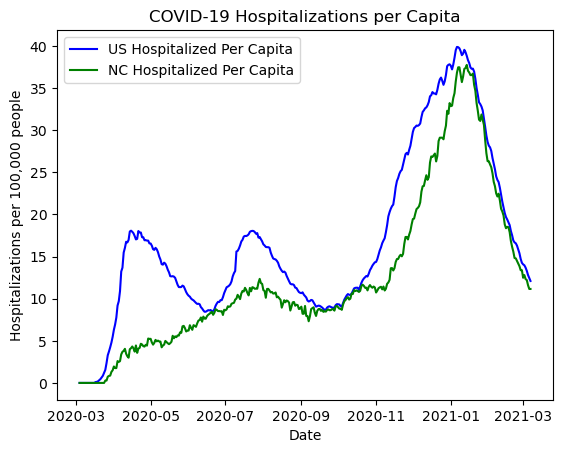

In [6]:
# Plot line charts of US Hospitalized Per Capita and NC Hospitalized Per Capita

US_Hosp_percap, = plt.plot(NC_US_Hospital.index, NC_US_Hospital['US Hospitalized Per Capita'], label='US Hospitalized Per Capita', color='blue')
NC_Hosp_percap, = plt.plot(NC_US_Hospital.index, NC_US_Hospital['NC Hospitalized Per Capita'], label='NC Hospitalized Per Capita', color='green')
plt.legend(handles=[US_Hosp_percap, NC_Hosp_percap], loc='best')
plt.title('COVID-19 Hospitalizations per Capita')
plt.xlabel('Date')
plt.ylabel('Hospitalizations per 100,000 people')
plt.show()

    Timeline trend of the number of Covid deaths in USA compared to NC


In [66]:
# Reduce to only the columns needed

NC_US_Deaths = NC_US_COVID[['date','US Population','US DeathIncrease','NC Population','NC DeathIncrease']].copy()

# Make dates usable for charting
NC_US_Deaths['date'] = pd.to_datetime(NC_US_Deaths['date'])

# Set date as the index

NC_US_Deaths = NC_US_Deaths.set_index('date')

# Reverse the order for graphing

NC_US_Deaths = NC_US_Deaths.iloc[::-1]

# Drop rows with null values

NC_US_Deaths = NC_US_Deaths.dropna()

# Add per-capita rows

NC_US_Deaths['US Deaths Per Capita'] = (NC_US_Deaths['US DeathIncrease'] / NC_US_Deaths['US Population']) * 100000
NC_US_Deaths['NC Deaths Per Capita'] = (NC_US_Deaths['NC DeathIncrease'] / NC_US_Deaths['NC Population']) * 100000

# Get increase in deaths on a monthly basis
Monthly_US_Deaths = pd.DataFrame(NC_US_Deaths.groupby(pd.PeriodIndex(NC_US_Deaths.index, freq='M'))['US Deaths Per Capita'].sum()).reset_index()
Monthly_NC_Deaths = pd.DataFrame(NC_US_Deaths.groupby(pd.PeriodIndex(NC_US_Deaths.index, freq='M'))['NC Deaths Per Capita'].sum()).reset_index()

Monthly_US_Deaths['date'] = Monthly_US_Deaths['date'].dt.strftime('%Y-%m')
Monthly_NC_Deaths['date'] = Monthly_NC_Deaths['date'].dt.strftime('%Y-%m')

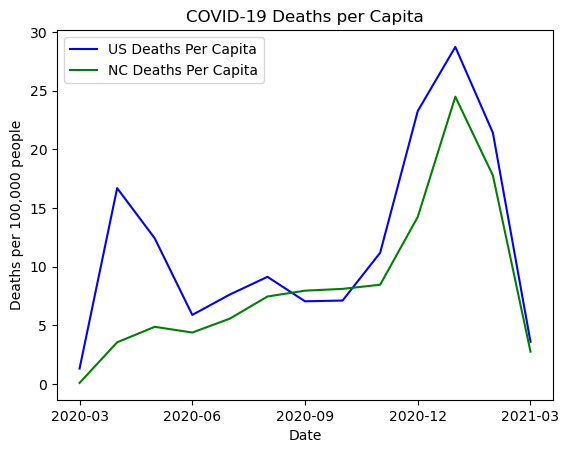

In [67]:
# Plot line charts of US Hospitalized Per Capita and NC Hospitalized Per Capita

US_Death_percap, = plt.plot(Monthly_US_Deaths['date'], Monthly_US_Deaths['US Deaths Per Capita'], label='US Deaths Per Capita', color='blue')
NC_Death_percap, = plt.plot(Monthly_NC_Deaths['date'], Monthly_NC_Deaths['NC Deaths Per Capita'], label='NC Deaths Per Capita', color='green')
plt.legend(handles=[US_Death_percap, NC_Death_percap], loc='best')
plt.xticks(np.arange(0, len(Monthly_US_Deaths['date']),3))
plt.title('COVID-19 Deaths per Capita')
plt.xlabel('Date')
plt.ylabel('Deaths per 100,000 people')
plt.show()